<a href="https://colab.research.google.com/github/eduviana1/TEEP_Chuva_Horaria/blob/main/7_Distribuicoes_AlertaRio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm # Barra de Loading...

Mounted at /content/drive


In [ ]:
alertario = pd.read_csv('/content/drive/MyDrive/Grupo 4 - TEEP/Trabalho Prático - Parte II/krig_UTC_chuva_horaria_alertario.csv')
alertario['DataHora'] = pd.to_datetime(alertario['DataHora'], format = '%Y-%m-%d %H:%M:%S')
alertario.head()

,DataHora,alto_da_boa_vista,anchieta,av_brasil_mendanha,bangu,barrinha,campo_grande,cidade_de_deus,copacabana,grajau,...,santa_cruz,santa_teresa,sao_cristovao,saude,sepetiba,tanque,tijuca,tijuca_muda,urca,vidigal
0,1997-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1997-01-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1997-01-01 06:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1997-01-01 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1997-01-01 08:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Anual

<ipython-input-4-2030969706>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax['Estacoes'].set_xticklabels(alerta_anual_estacao.columns, rotation=90)
<ipython-input-4-2030969706>:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax['Ano'].set_xticklabels(alerta_anual_estacao.T.columns, rotation=90)
<ipython-input-4-2030969706>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax['Barra'].set_xticklabels(alerta_anual_cidade.index, rotation=90)


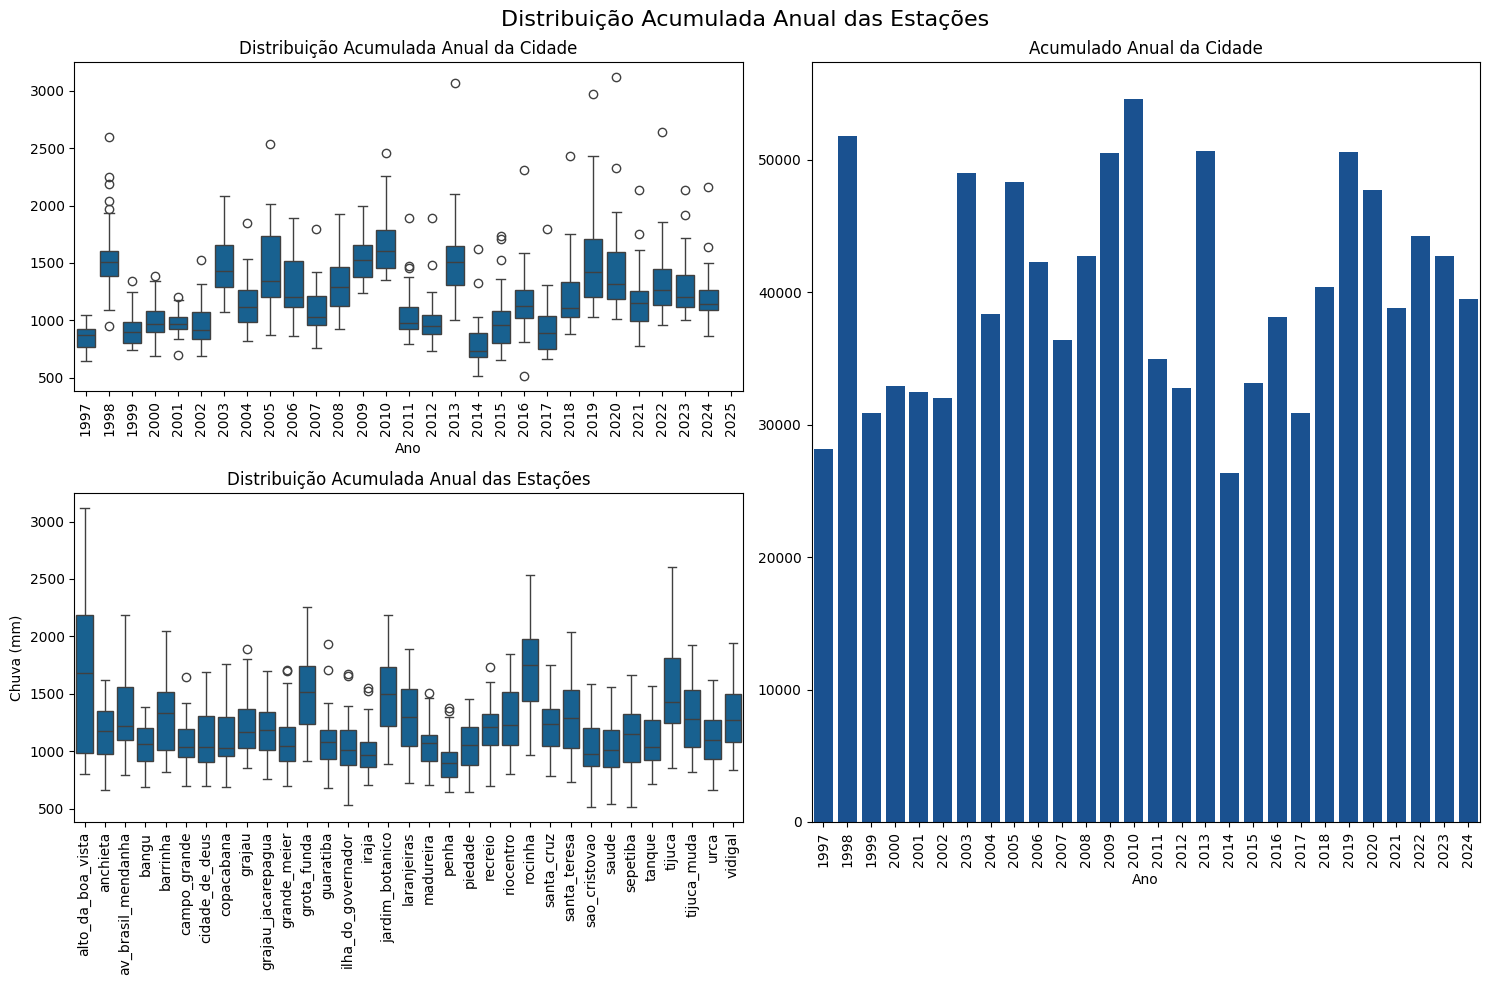

In [ ]:
# Distribuição Acumulada Anual - ALERTA RIO
alerta_anual_estacao = alertario.copy()
alerta_anual_estacao['Ano'] = alerta_anual_estacao['DataHora'].dt.year
alerta_anual_estacao = alerta_anual_estacao.drop('DataHora', axis=1).groupby('Ano').sum()
# Filtrando datas
alerta_anual_estacao = alerta_anual_estacao[alerta_anual_estacao>0].iloc[:-1]  # Remove 2025 se estiver incompleto

# Acumulado anual da cidade (soma de todas as estações por ano)
alerta_anual_cidade = alerta_anual_estacao.sum(axis=1)

# Plotagem
fig, ax = plt.subplot_mosaic([['Ano', 'Barra'],
                               ['Estacoes', 'Barra']], figsize=(15, 10))

# Boxplot da distribuição anual por estação (linhas são anos, colunas são estações)
sns.boxplot(alerta_anual_estacao, ax=ax['Estacoes'], color='#0465a4')

# Boxplot da distribuição anual por ano (linhas são estações, colunas são anos)
sns.boxplot(alerta_anual_estacao.T, ax=ax['Ano'], color='#0465a4')

# Barra do acumulado total da cidade por ano
sns.barplot(x=alerta_anual_cidade.index, y=alerta_anual_cidade.values, ax=ax['Barra'], color='#0650A4')

# Títulos
ax['Estacoes'].set_title('Distribuição Acumulada Anual das Estações')
ax['Ano'].set_title('Distribuição Acumulada Anual da Cidade')
ax['Barra'].set_title('Acumulado Anual da Cidade')

# Rótulos dos eixos X
ax['Estacoes'].set_xticklabels(alerta_anual_estacao.columns, rotation=90)
ax['Ano'].set_xticklabels(alerta_anual_estacao.T.columns, rotation=90)
ax['Barra'].set_xticklabels(alerta_anual_cidade.index, rotation=90)

# Rótulos dos eixos Y
ax['Estacoes'].set_ylabel('Chuva (mm)')
ax['Ano']

fig.suptitle('Distribuição Acumulada Anual das Estações', fontsize = 16)
fig.tight_layout()

fig.savefig('/content/drive/MyDrive/Grupo 4 - TEEP/Trabalho Prático - Parte II/Figuras/Alerta Rio Acumulado Anual das Estações.jpg')
plt.show()

# Mensal

<ipython-input-5-3188788568>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax['Estacoes'].set_xticklabels(alerta_mensal_estacao.columns, rotation=90)
<ipython-input-5-3188788568>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax['Mes'].set_xticklabels(meses, rotation=90)
<ipython-input-5-3188788568>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax['Barra'].set_xticklabels(meses, rotation=90)


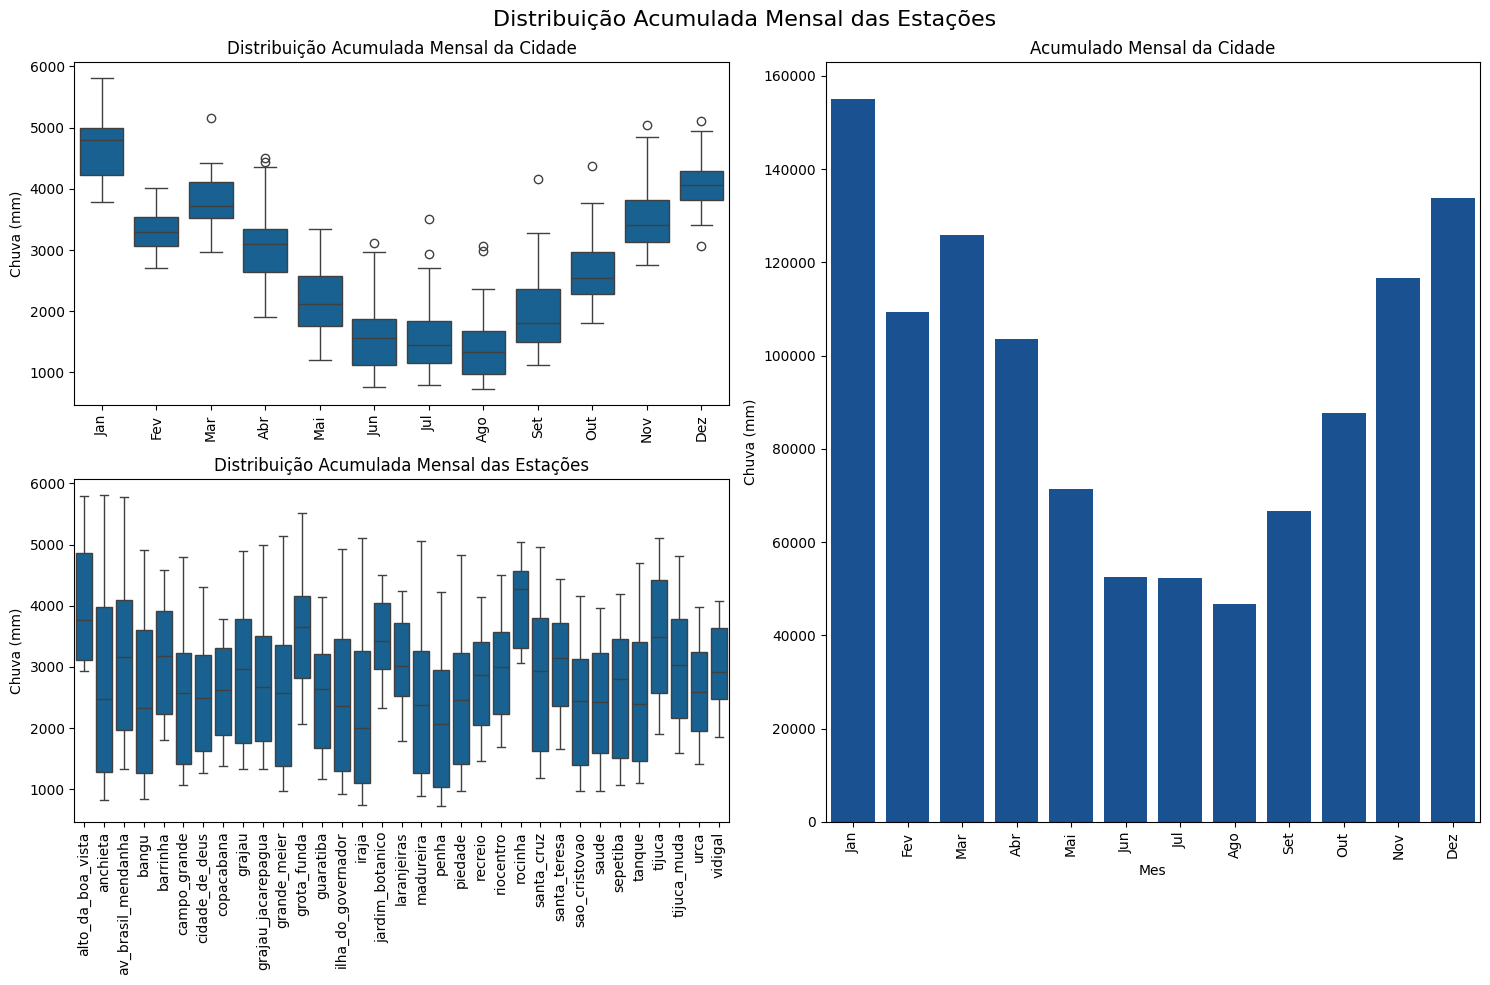

In [ ]:
# Distribuição Acumulada Mensal - ALERTA RIO
alerta_mensal = alertario.copy()
# alerta_mensal_estacao['Ano'] = alerta_mensal_estacao['DataHora'].dt.year
alerta_mensal['Mes'] = alerta_mensal['DataHora'].dt.month

meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
# Agrupa por ano e mês somando as chuvas em cada estação
alerta_mensal_estacao = alerta_mensal.drop('DataHora', axis=1).groupby(['Mes']).sum()
alerta_mensal_estacao = alerta_mensal_estacao[alerta_mensal_estacao>0]
# Acumulado mensal da cidade (soma de todas as estações por cada par ano-mês)
alerta_mensal_cidade = alerta_mensal_estacao.sum(axis = 1)

# Plotagem
fig, ax = plt.subplot_mosaic([['Mes', 'Barra'],
                               ['Estacoes', 'Barra']], figsize=(15, 10))

# Boxplot da distribuição mensal por estação (eixo X são estações, linhas são ano/mês)
sns.boxplot(alerta_mensal_estacao, ax=ax['Estacoes'], color='#0465a4')

# Boxplot da distribuição mensal por tempo (cada ponto é um mês, somando todas as estações)
sns.boxplot(alerta_mensal_estacao.T, ax=ax['Mes'], color='#0465a4')

# Barra do acumulado total da cidade mês a mês
sns.barplot(x=alerta_mensal_cidade.index.astype(str), y=alerta_mensal_cidade.values, ax=ax['Barra'], color='#0650A4')

# Títulos
ax['Estacoes'].set_title('Distribuição Acumulada Mensal das Estações')
ax['Mes'].set_title('Distribuição Acumulada Mensal da Cidade')
ax['Barra'].set_title('Acumulado Mensal da Cidade')

# Rótulos dos eixos X
ax['Estacoes'].set_xticklabels(alerta_mensal_estacao.columns, rotation=90)
ax['Mes'].set_xticklabels(meses, rotation=90)
ax['Barra'].set_xticklabels(meses, rotation=90)

# Rótulos dos eixos Y
ax['Estacoes'].set_ylabel('Chuva (mm)')
ax['Mes'].set_ylabel('Chuva (mm)')
ax['Barra'].set_ylabel('Chuva (mm)')

# Remove label redundante do eixo X no boxplot de meses
ax['Mes'].set_xlabel('')

fig.suptitle('Distribuição Acumulada Mensal das Estações', fontsize = 16)
fig.tight_layout()

fig.savefig('/content/drive/MyDrive/Grupo 4 - TEEP/Trabalho Prático - Parte II/Figuras/Alerta Rio Acumulado Mensal das Estações.jpg')
plt.show()

# Diario

<ipython-input-4-3018289895>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax['Estacoes'].set_xticklabels(alerta_diario_estacao.columns, rotation=90)
<ipython-input-4-3018289895>:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax['Dia'].set_xticklabels(alerta_diario_top20, rotation=90)
<ipython-input-4-3018289895>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax['Barra'].set_xticklabels(alerta_diario_cidade.index, rotation=90)


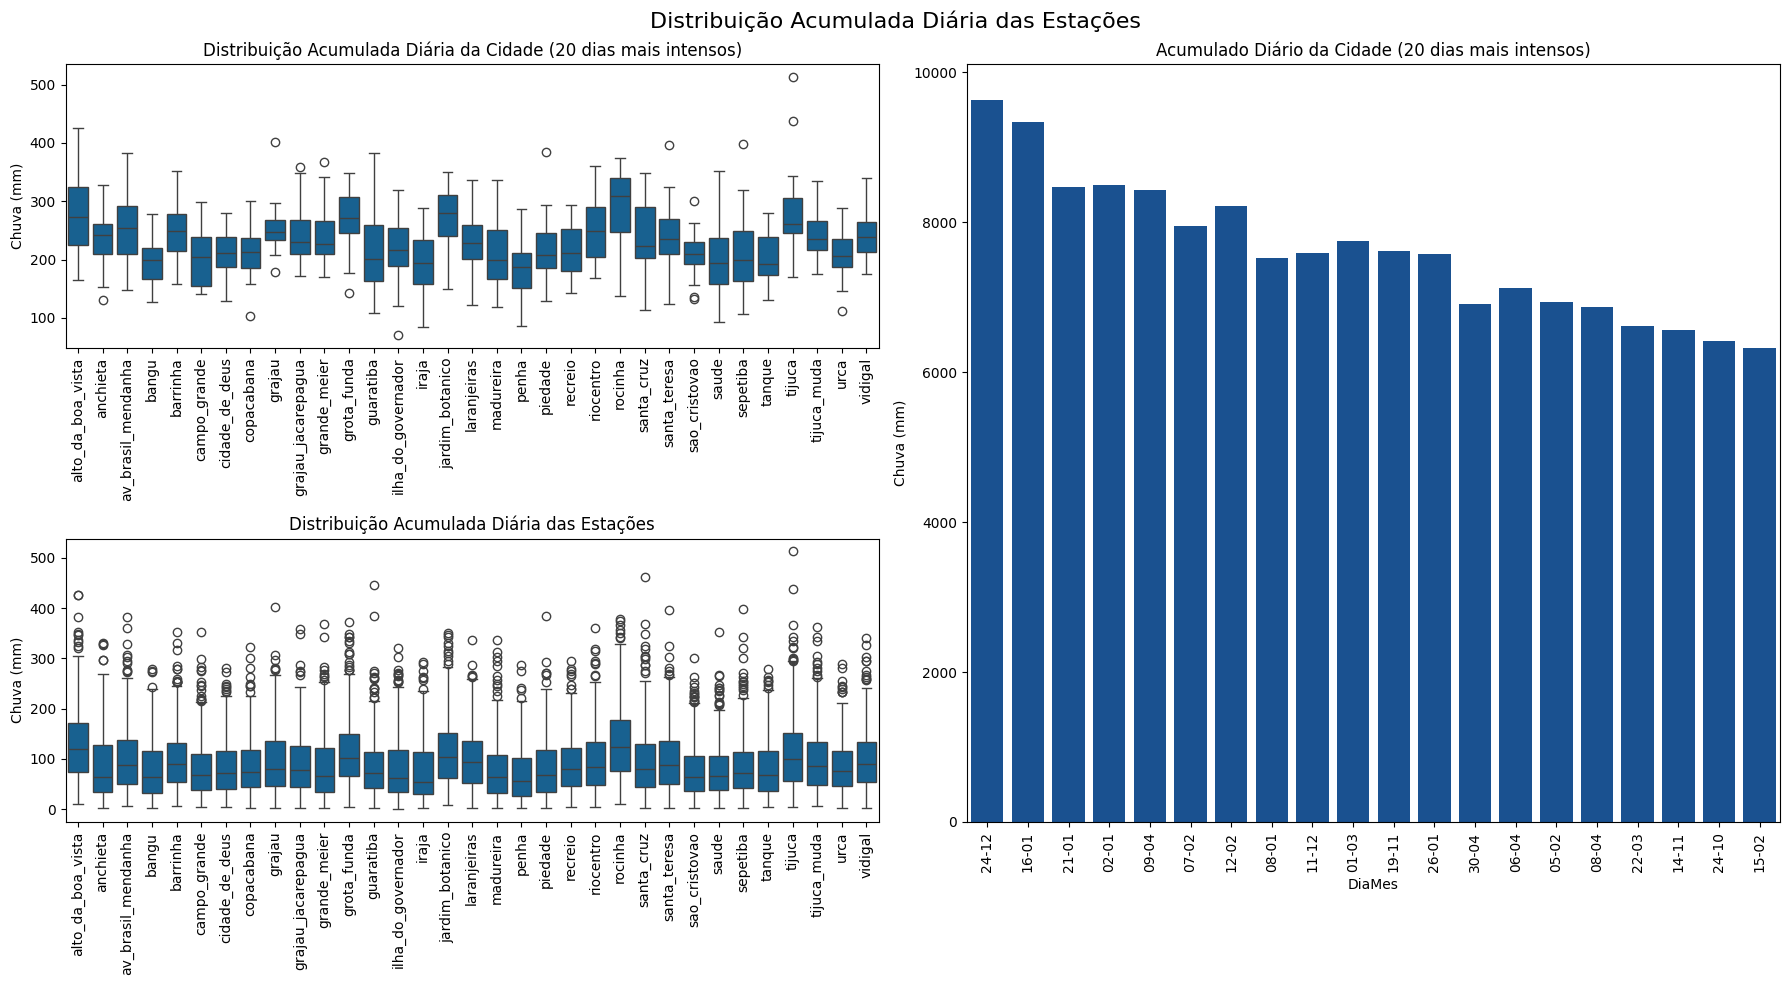

In [ ]:
# Distribuição Acumulada Diária - ALERTA RIO
alerta_diario = alertario.copy()
alerta_diario['DiaMes'] = alerta_diario['DataHora'].dt.strftime('%d-%m')

# Agrupa apenas pelo dia do mês (1 a 31) somando as chuvas
alerta_diario_estacao = alerta_diario.drop('DataHora', axis=1).groupby('DiaMes').sum()
alerta_diario_estacao = alerta_diario_estacao[alerta_diario_estacao>0]
# Encontrando os 20 dias mais intensos
top_20_dias = alerta_diario_estacao.median(axis = 1).sort_values(ascending = False).head(20).index.values
alerta_diario_top20= alerta_diario_estacao.loc[top_20_dias]

# Acumulado diário da cidade (soma das estações por cada dia do mês)
alerta_diario_cidade = alerta_diario_top20.sum(axis = 1)

# Encontrando os 20 dias mais intensos para analisar


# Plotagem
fig, ax = plt.subplot_mosaic([['Dia', 'Barra'],
                               ['Estacoes', 'Barra']], figsize=(18, 10))

# Boxplot da distribuição diária da cidade (considerando todas as estações)
sns.boxplot(alerta_diario_top20, ax=ax['Dia'], color='#0465a4')

# Boxplot da distribuição diária por estação
sns.boxplot(alerta_diario_estacao, ax=ax['Estacoes'], color='#0465a4')

# Barplot do acumulado da cidade por dia do mês
sns.barplot(x=alerta_diario_cidade.index, y=alerta_diario_cidade.values, ax=ax['Barra'], color='#0650A4')

# Títulos
ax['Estacoes'].set_title('Distribuição Acumulada Diária das Estações')
ax['Dia'].set_title('Distribuição Acumulada Diária da Cidade (20 dias mais intensos)')
ax['Barra'].set_title('Acumulado Diário da Cidade (20 dias mais intensos)')

# Eixos X
ax['Estacoes'].set_xticklabels(alerta_diario_estacao.columns, rotation=90)
ax['Dia'].set_xticklabels(alerta_diario_top20, rotation=90)
ax['Barra'].set_xticklabels(alerta_diario_cidade.index, rotation=90)

# Eixos Y
ax['Estacoes'].set_ylabel('Chuva (mm)')
ax['Dia'].set_ylabel('Chuva (mm)')
ax['Barra'].set_ylabel('Chuva (mm)')

# Remove label redundante
ax['Dia'].set_xlabel('')

fig.suptitle('Distribuição Acumulada Diária das Estações', fontsize = 16)
fig.tight_layout()

fig.savefig('/content/drive/MyDrive/Grupo 4 - TEEP/Trabalho Prático - Parte II/Figuras/Alerta Rio Acumulado Diária das Estações.jpg')

plt.show()


<ipython-input-9-2946120665>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(alerta_diario_estacao.columns, rotation = 90)


[]

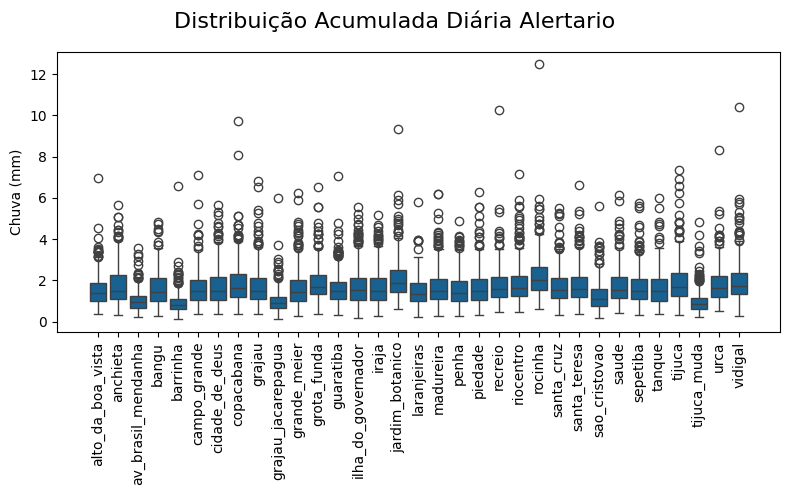

In [ ]:
# Diario
alerta_diario = alertario.copy()
alerta_diario.set_index('DataHora', inplace = True)
alerta_diario = alerta_diario[alerta_diario>0]
alerta_diario.reset_index(names = 'DataHora', inplace = True)
alerta_diario['DiaMes'] = alerta_diario['DataHora'].dt.strftime('%d-%m')
alerta_diario_estacao = alerta_diario.drop('DataHora', axis = 1).groupby('DiaMes').mean()
alerta_diario_cidade = alerta_diario_estacao.sum(axis = 1)

fig, ax = plt.subplots(figsize = (8,5))

sns.boxplot(alerta_diario_estacao, ax = ax, color = '#0465a4')

ax.set_xticklabels(alerta_diario_estacao.columns, rotation = 90)
ax.set_ylabel('Chuva (mm)')


fig.suptitle('Distribuição Acumulada Diária Alertario', fontsize = 16)
fig.tight_layout()

fig.savefig('/content/drive/MyDrive/Grupo 4 - TEEP/Trabalho Prático - Parte II/Figuras/Alertario Acumulado Diário das Estações.jpg')

plt.plot()

<ipython-input-46-133429441>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax['Estacoes'].set_xticklabels(alerta_horario_estacao.columns, rotation=90)
<ipython-input-46-133429441>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax['Hora'].set_xticklabels(alerta_horario_estacao.T.columns, rotation=90)
<ipython-input-46-133429441>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax['Barra'].set_xticklabels(alerta_horario_cidade.index.astype(str), rotation=90)


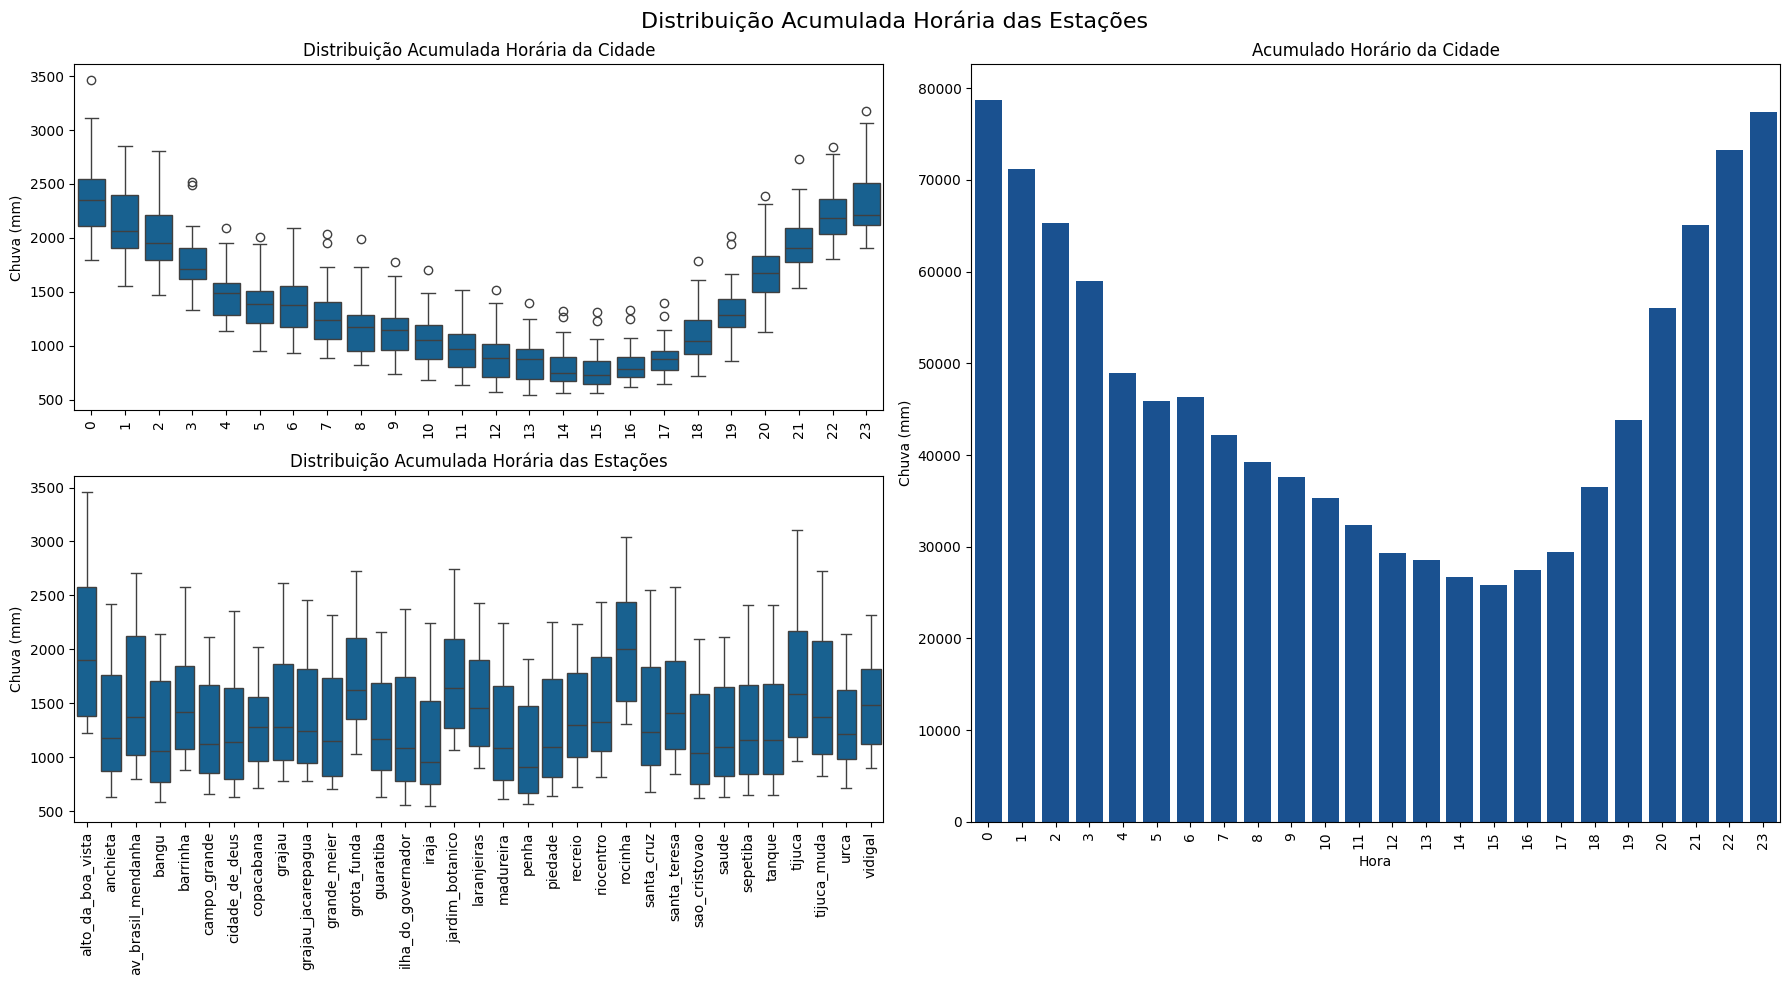

In [ ]:
# Distribuição Acumulada Horária por Data Completa - ALERTA RIO

# Cria uma coluna com a data completa incluindo a hora (YYYY-MM-DD HH:00)
alerta_horario = alertario.copy()
alerta_horario['Hora'] = alerta_horario['DataHora'].dt.hour

# Agrupa pela data-hora e soma as estações
alerta_horario_estacao = alerta_horario.drop('DataHora', axis=1).groupby('Hora').sum()

# Acumulado horário da cidade (soma das estações em cada horário)
alerta_horario_cidade = alerta_horario_estacao.sum(axis=1)

# Plotagem
fig, ax = plt.subplot_mosaic([['Hora', 'Barra'],
                               ['Estacoes', 'Barra']], figsize=(18, 10))

# Boxplot da distribuição horária por estação (ao longo dos horários)
sns.boxplot(alerta_horario_estacao, ax=ax['Estacoes'], color='#0465a4')

# Boxplot da distribuição da cidade ao longo dos horários (linha do tempo)
sns.boxplot(alerta_horario_estacao.T, ax=ax['Hora'], color='#0465a4')

# Barplot do acumulado horário da cidade
sns.barplot(x=alerta_horario_cidade.index.astype(str), y=alerta_horario_cidade.values, ax=ax['Barra'], color='#0650A4')

# Títulos
ax['Estacoes'].set_title('Distribuição Acumulada Horária das Estações')
ax['Hora'].set_title('Distribuição Acumulada Horária da Cidade')
ax['Barra'].set_title('Acumulado Horário da Cidade')

# Eixos X
ax['Estacoes'].set_xticklabels(alerta_horario_estacao.columns, rotation=90)
ax['Hora'].set_xticklabels(alerta_horario_estacao.T.columns, rotation=90)
ax['Barra'].set_xticklabels(alerta_horario_cidade.index.astype(str), rotation=90)

# Eixos Y
ax['Estacoes'].set_ylabel('Chuva (mm)')
ax['Hora'].set_ylabel('Chuva (mm)')
ax['Barra'].set_ylabel('Chuva (mm)')

# Remove label redundante
ax['Hora'].set_xlabel('')

fig.suptitle('Distribuição Acumulada Horária das Estações', fontsize = 16)
fig.tight_layout()

fig.savefig('/content/drive/MyDrive/Grupo 4 - TEEP/Trabalho Prático - Parte II/Figuras/Alerta Rio Acumulado Horária das Estações.jpg')

plt.show()
